<a href="https://colab.research.google.com/github/michmazbout/ML-Project/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

In [ ]:
import seaborn as sns
import requests
from io import StringIO
import pooch
#from google.colab import drive
#drive.mount("/content/gdrive")

In [ ]:
url = 'https://raw.githubusercontent.com/michmazbout/ML-Project/main/oil_spill.csv'
#location = '/content/gdrive/MyDrive/oil_spill.csv'
df  = pd.read_csv(url)
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [ ]:
df['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(np.sum(y_test,axis =0))

12


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
rfc = RandomForestClassifier(n_estimators=3048,max_depth=2024,random_state=1)
dtc = DecisionTreeClassifier(max_depth=864,random_state=1)
gbc = GradientBoostingClassifier(n_estimators=2048,learning_rate=0.1)
#gnb = GaussianNB(var_smoothing=0.000000000245) for this smoothing we will catch the most oil spills out of all the rest of the of the functions but it will also catch 15 false positives
gnb = GaussianNB(var_smoothing=0.000000015) # best in my opinion 9 oil spils out of 12 and only 7 fp

In [ ]:
rfc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
gbc.fit(x_train,y_train)
gnb.fit(x_train,y_train)

GaussianNB(var_smoothing=1.5e-08)

In [ ]:
y_pred_rfc = rfc.predict(x_test)
y_pred_gbc = gbc.predict(x_test)
y_pred_dtc = dtc.predict(x_test)
y_pred_gnb = gnb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_gbc = confusion_matrix(y_test,y_pred_gbc)
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
cm_gnb = confusion_matrix(y_test,y_pred_gnb)

In [ ]:
acc_rfc = accuracy_score(y_test,y_pred_rfc)
acc_gbc = accuracy_score(y_test,y_pred_gbc)
acc_dtc = accuracy_score(y_test,y_pred_dtc)
acc_gnb = accuracy_score(y_test,y_pred_gnb)

In [ ]:
print(f'\nThe accuracy of the model Random Forest Classifier is {acc_rfc:.1%}')
print(f'\nThe accuracy of the model Gradient Boosting Classifier is {acc_gbc:.1%}')
print(f'\nThe accuracy of the model Decision Tree Classifier is {acc_dtc:.1%}')
print(f'\nThe accuracy of the model Gaussian NB Classifier is {acc_gnb:.1%}')


The accuracy of the model Random Forest Classifier is 96.3%

The accuracy of the model Gradient Boosting Classifier is 95.7%

The accuracy of the model Decision Tree Classifier is 93.6%

The accuracy of the model Gaussian NB Classifier is 94.7%


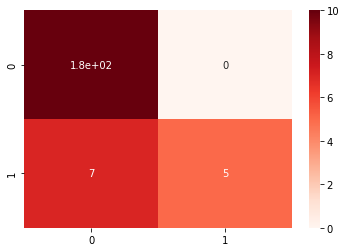

In [ ]:
""" We can see here that the Random Forest Regression and Gradient_Boosting_Classifier results best on this dataset"""

"""For Random Forestr Regression..."""
sns.heatmap(cm_rfc,cmap="Reds",annot=True,vmax=10,vmin=0)


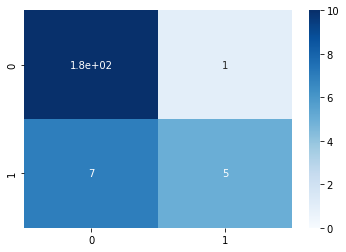

In [ ]:
"""For Gradient Boosting Classifier..."""
sns.heatmap(cm_gbc,cmap="Blues",annot=True,vmax=10,vmin=0)


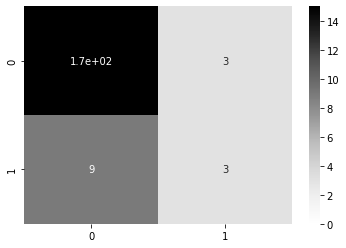

In [ ]:
"""For Decision Tree Classifier..."""
sns.heatmap(cm_dtc,cmap="Greys",annot=True,vmax=15,vmin=0)


'Thus we have acheived 97% Accuracy by tunig the attrributes of Random Forest Classifier'

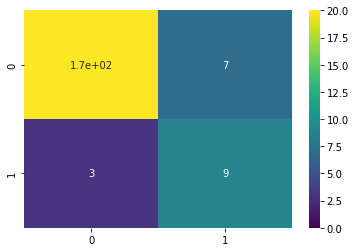

In [ ]:
"""For GaussianNB"""
sns.heatmap(cm_gnb,cmap="viridis",annot=True,vmax=20,vmin=0)

"""Thus we have acheived 97% Accuracy by tunig the attrributes of Random Forest Classifier"""

  0%|          | 0/188 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

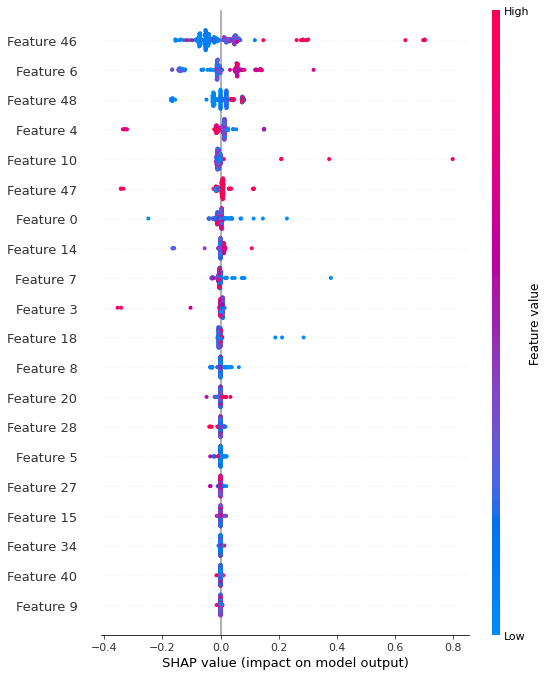

In [ ]:
import shap
#X_test_summary = shap.sample(x_test, 10)
explainer = shap.KernelExplainer(dtc.predict,x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

!pip install shap